# **INTELIGENCIA DEL NEGOCIO / Business Intelligence**
## **ASSIGNMENT A4 - WORD EMBEDDING**

**INSTRUCCIONES / RECOMENDACIONES**

- Se recomienda leer con detalle la descripción de cada una de las celdas.
- Las celdas que ya tienen código, se deberán ejecutar directamente. Nota: existen alguna celdas con código que deberán completarse o parametrizarse.
- Las celdas que están vacías, se completarán con la implementación requerida en el notebook.
- No se incluirán más celdas de las establecidas en el presente notebook, por lo que la solución al mismo deberá implementarse exclusivamente en las celdas vacías.
- Scikit-Learn es un paquete muy útil para las operaciones de preprocesamiento de los datos, como estandarización, normalización, codificación, etc.
- La entrega se realizará vía Moodle. Será necesario subir la solución a este notebook con el nombre: **NOMBRE_GRUPO.ipynb**

- **Fecha de Publicación: 08/04/2024**
- **Fecha de Entrega: 14/04/2024**
- **Test: 15/04/2024**


In [64]:
! pip install --upgrade gensim
! pip install wordcloud
! pip install tqdm

Vamos a trabajar con un dataset de titulares de noticias de la ABC en Australia durante 2020 y 2021. Vamos a realizar un análisis de text mining para tratar de saber de que temas trataron estos titulares.

In [65]:
import pandas as pd
from wordcloud import WordCloud
from functools import reduce
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import random
from tqdm import tqdm

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# path = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Proyecto4/abcnews_2020.csv"
path = "/content/drive/MyDrive/data/abcnews_2020.csv"

pd_data = pd.read_csv(path)

In [68]:
texts = pd_data["headline_text"].values

# Nube de palabras

Vamos a construir una nube de palabras que nos permita visualizar cuáles son las palabras más mencionadas.

Para ello, primero debemos construir un diccionario cuya clave sea la palabra y el valor sea el número de palabras que aparece.

Vamos a utilizar el <a href=https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html> CountVectorizer </a> de sklearn para ello.

In [69]:
cv = CountVectorizer(stop_words="english")

Ajuste el cv en los textos y consiga la matriz de conteos.

In [70]:
# Fit the vectorizer on the texts and transform the texts into a sparse matrix
X = cv.fit_transform(texts)


Ahora, construya el diccionario. Para conseguir la palabra que representa cada columna, use el atributo vocabulary_ de count vectorizer.

In [71]:
vocab = cv.vocabulary_
print(vocab)

{'10': 13, 'people': 16373, 'injured': 11257, 'fitzroy': 8595, 'river': 18730, 'boat': 2971, 'crash': 5662, '2019': 212, 'australias': 1971, 'hottest': 10728, 'driest': 7131, 'year': 24328, 'record': 17988, 'family': 8240, 'film': 8490, 'return': 18542, 'lake': 12496, 'conjola': 5178, 'angus': 1384, 'taylor': 21726, 'investigation': 11461, 'referred': 18079, 'afp': 978, 'anthony': 1444, 'albanese': 1126, 'continues': 5298, 'action': 802, 'australian': 1968, 'expats': 8034, 'face': 8157, 'tax': 21713, 'slug': 20283, 'cgt': 4281, 'main': 13428, 'residence': 18415, 'exemption': 7998, 'underground': 22807, 'hospital': 10701, 'used': 23070, 'aviation': 2022, 'fatality': 8310, 'rate': 17833, 'ethiopian': 7872, 'airlines': 1088, 'blake': 2864, 'walton': 23558, 'stayed': 20836, 'defend': 6231, 'property': 17314, 'filmed': 8491, 'brave': 3276, 'malua': 13499, 'locals': 13067, 'saved': 19268, 'town': 22275, 'nsw': 15363, 'bushfire': 3678, 'emergency': 7584, 'glenlusk': 9438, 'near': 14996, 'hoba

Obtener el número de frecuencia de las palabras (freqs) para posteriormente utilizarlo a la hora de dibujar la nube.

In [72]:
freqs = {}

for word, index in vocab.items():
    freqs[word] = X[:, index].sum()

Finalmente dibujamos la nube:

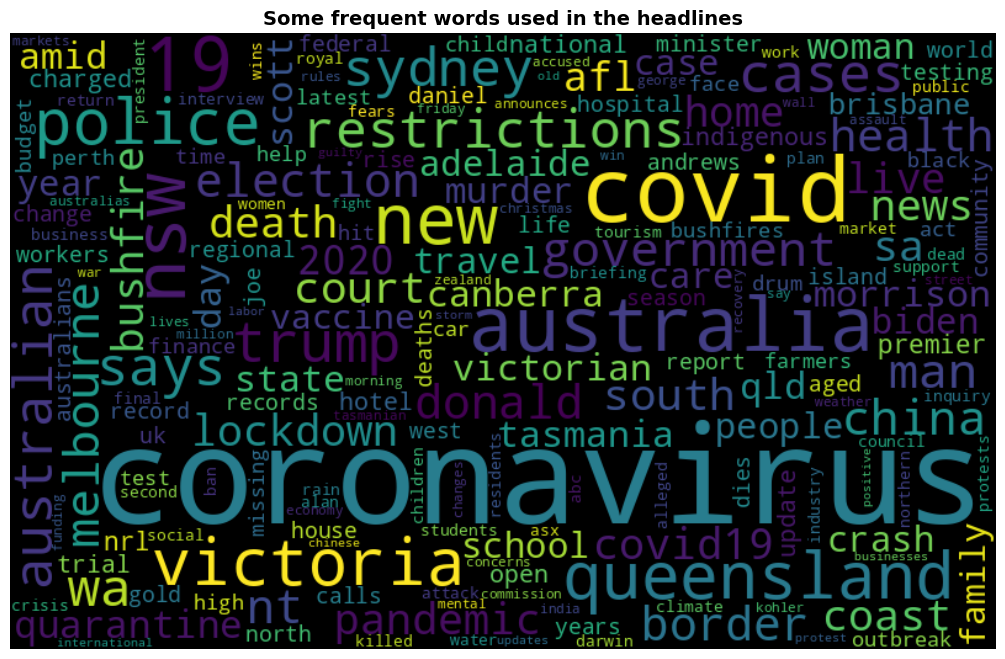

In [73]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(freqs)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Some frequent words used in the headlines", weight='bold', fontsize=14)
plt.show()

**¿Sabrías descifrar algunos temas frecuentes en los titulares?**

Podemos observar que el tema más hablado es el Coronavirud ya que las palabras más usadas giran entorno a covid y coronavirus, con palabras como china, health, restrictions and quarantine.

También podemos observar un bias hacia asutralia, ya que hay muchas palabras usadas cómo victoria, australian, australia, queensland.

# Topic Modelling

Vamos a vectorizar los textos como la media de las palabras. Para ello, primero vamos a entrenar un word embedding sobre los textos.

## Word Embedding

In [74]:
from gensim.utils import tokenize
def tokenizer(text):
  """Returns a list of tokens"""
  return tokenize(text, lowercase=True)

list(tokenizer(texts[0]))

tokenized_sentences = []
for i in range(len(texts)):
  tokenized_sentences.append(list(tokenizer(texts[i])))


Especificar los parámetros del modelado.

In [75]:
SIZE_VECTORS = 100
WINDOW = 7
EPOCHS = 5
MIN_COUNT = 20

Entrenar el modelo de embeddings...

In [76]:
we_model = Word2Vec(sentences=tokenized_sentences, vector_size=SIZE_VECTORS, window=WINDOW, epochs=EPOCHS ,min_count=MIN_COUNT)

Elija algunas palabras de la nube y muestre sus palabras más cercanas. ¿Aparecen resultados con sentido?

In [77]:
we_model.wv.most_similar("earth")

[('independence', 0.9935312271118164),
 ('nasa', 0.9932068586349487),
 ('debut', 0.9931620359420776),
 ('sun', 0.9930093884468079),
 ('space', 0.9929366707801819),
 ('book', 0.9925715327262878),
 ('song', 0.9922828674316406),
 ('ball', 0.9922240972518921),
 ('winner', 0.9921860098838806),
 ('spacex', 0.9921249151229858)]

In [78]:
we_model.wv.most_similar("king")

[('letters', 0.9951096177101135),
 ('walk', 0.9947171211242676),
 ('pays', 0.993266761302948),
 ('finding', 0.9925898313522339),
 ('nba', 0.9915485978126526),
 ('transgender', 0.9913705587387085),
 ('tribute', 0.9909392595291138),
 ('secret', 0.9908305406570435),
 ('champion', 0.9908058643341064),
 ('joel', 0.9908016324043274)]

**Observamos que generalmente aparecen resultados sin mucho sentido y con unas similitudes excesivamente altas, ya que no bajan del 0,99. Por lo que el modelo no está diferenciando el significado de las palabras**

# Sentence Embedding

Calculamos el vector de un texto como la media de los vectores de sus palabras.

Creamos la función que genera el vector.
Hay que tener cuidado con algunos casos especiales:
- Puede que no conozcamos el vector para alguna de las palabras. En ese caso la ignoramos y calculamos la media del resto de vectores.
- En el caso de que no conozcamos el vector de ninguna de las palabras, devolveremos None.

In [79]:
def vectorize_text(text):
  """Converts a text into a vector"""
  tokenized = tokenizer(text)

  vectors = []
  for w in tokenized:
    try:
        v = we_model.wv[w]
        vectors.append(v)
    except KeyError:
        pass
    return (text, np.mean(vectors, axis=0)) if len(vectors) else None

In [80]:
texts_with_vectors = [vectorize_text(t) for t in tqdm(texts)]
texts_with_vectors = [x for x in texts_with_vectors if x is not None] # Removes samples on which we could not compute the vector of the sentence

100%|██████████| 40181/40181 [00:01<00:00, 38726.35it/s]


In [81]:
texts_topic_modelling, vectors = zip(*texts_with_vectors)


## Clustering

Realice clustering usando KMeans sobre los vectores generados.
Elija el número de clusters usando el método del codo.

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

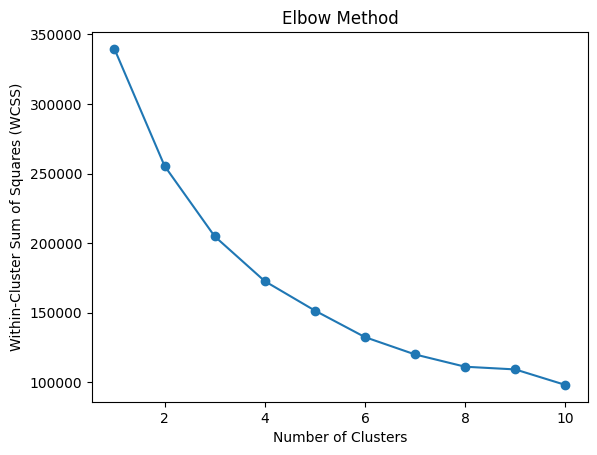

In [83]:
max_clusters = 10  # Maximum number of clusters to try

# Initialize list to store the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []

# Calculate WCSS for each number of clusters
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(vectors)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()


In [84]:
# Define the number of clusters based on the elbow method. 4 clusters seems the optimal.
num_clusters = 4

# Create KMeans instance
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to your vectors
kmeans.fit(vectors)

# Get the cluster assignments for each vector
cluster_assignments = kmeans.labels_

# Optionally, you can also get the centroids of the clusters
cluster_centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Nube de palabras para cada cluster

Para cada uno de los clusters generados:
- Tome todos los textos en ese cluster
- Dibuje la nube de palabras de dichos textos.

Debería observar que cada cluster habla de una temática distinta. ¿Puede explicar el significado de alguno de ellos?

Cluster 0:


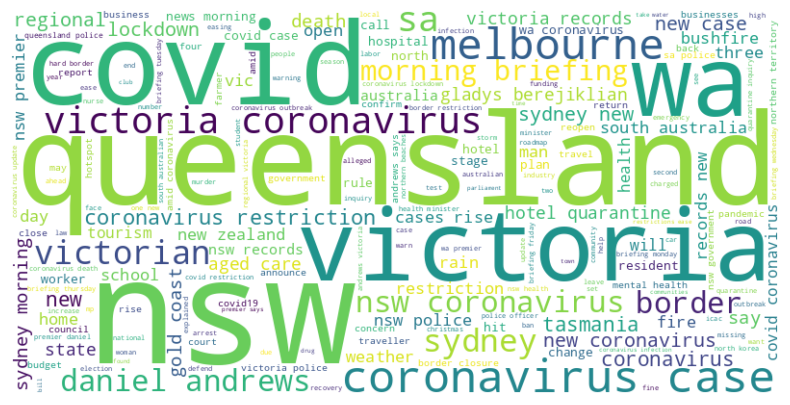

Cluster 1:


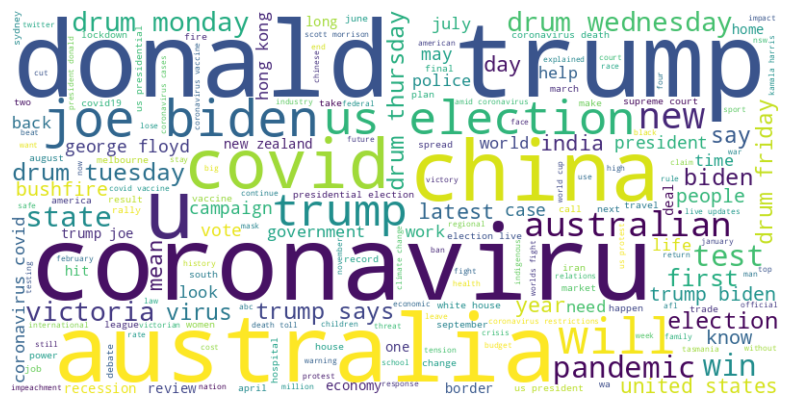

Cluster 2:


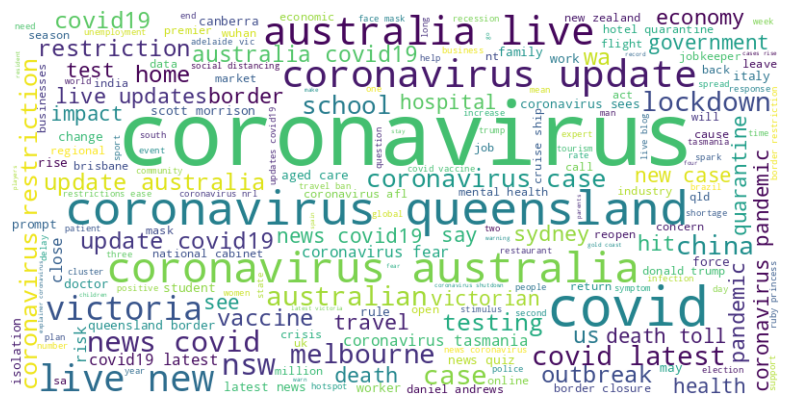

Cluster 3:


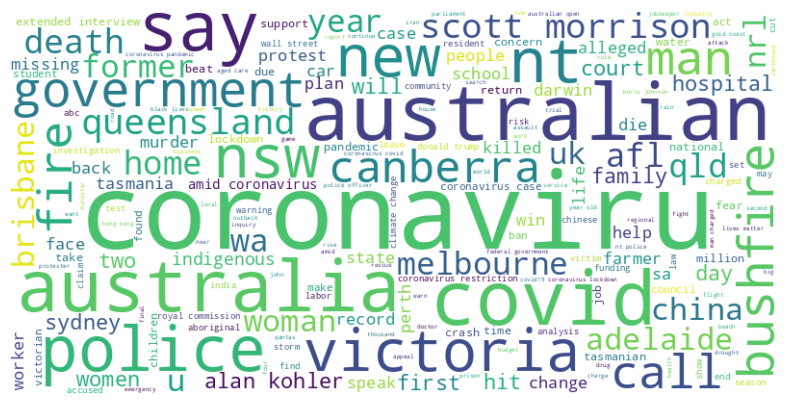

In [85]:
# Create a dictionary to store texts for each cluster
cluster_texts = {i: [] for i in range(num_clusters)}

# Group texts by cluster
for i, (cluster_id, text) in enumerate(zip(cluster_assignments, texts_topic_modelling)):
    cluster_texts[cluster_id].append(text)

# Define a function to generate and display word cloud for a cluster
def generate_wordcloud(texts):
    # Concatenate all texts in the cluster
    cluster_text = ' '.join(texts)
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word cloud for each cluster
for cluster_id, cluster_texts_list in cluster_texts.items():
    print(f"Cluster {cluster_id}:")
    generate_wordcloud(cluster_texts_list)

## Se han generado 4 nubes de palabras en base al número de clusters, pero no se detecta una diferencia clara entre los clusters.

# Reducción de vocabulario

Algunas nubes puede que hayan salido demasiado confusas porque palabras con semántica similar aparecen repetidas.

Vamos a detectar cuales tienen la misma semántica y agruparlas en una sola.

In [86]:
from scipy.cluster.hierarchy import linkage,  dendrogram, cut_tree
from gensim.parsing.preprocessing import STOPWORDS

all_stop_words = list(STOPWORDS) + ["afl", "u"] # appears in a lot of texts
we_model.wv.sort_by_descending_frequency() # Orders vocab in the model by descending order

all_words = np.asarray([w for w in list(we_model.wv.key_to_index.keys()) if w not in all_stop_words])


Vamos a ejecutar clustering jerárquico sobre las palabras para agrupar los sinónimos. Para elegir el threshold, tomamos unas pocas palabras y ejecutamos el algoritmo de clustering en ellas.

In [93]:
some_words = ["covid", "coronavirus", "president", "trump", "biden", "pandemic", "market", "markets", "quarantine", "restrictions", "lockdown", "news", "updates"]
vectors_of_words = [we_model.wv[w] for w in some_words]
Z = linkage(vectors_of_words,  metric="cosine", method="complete" )

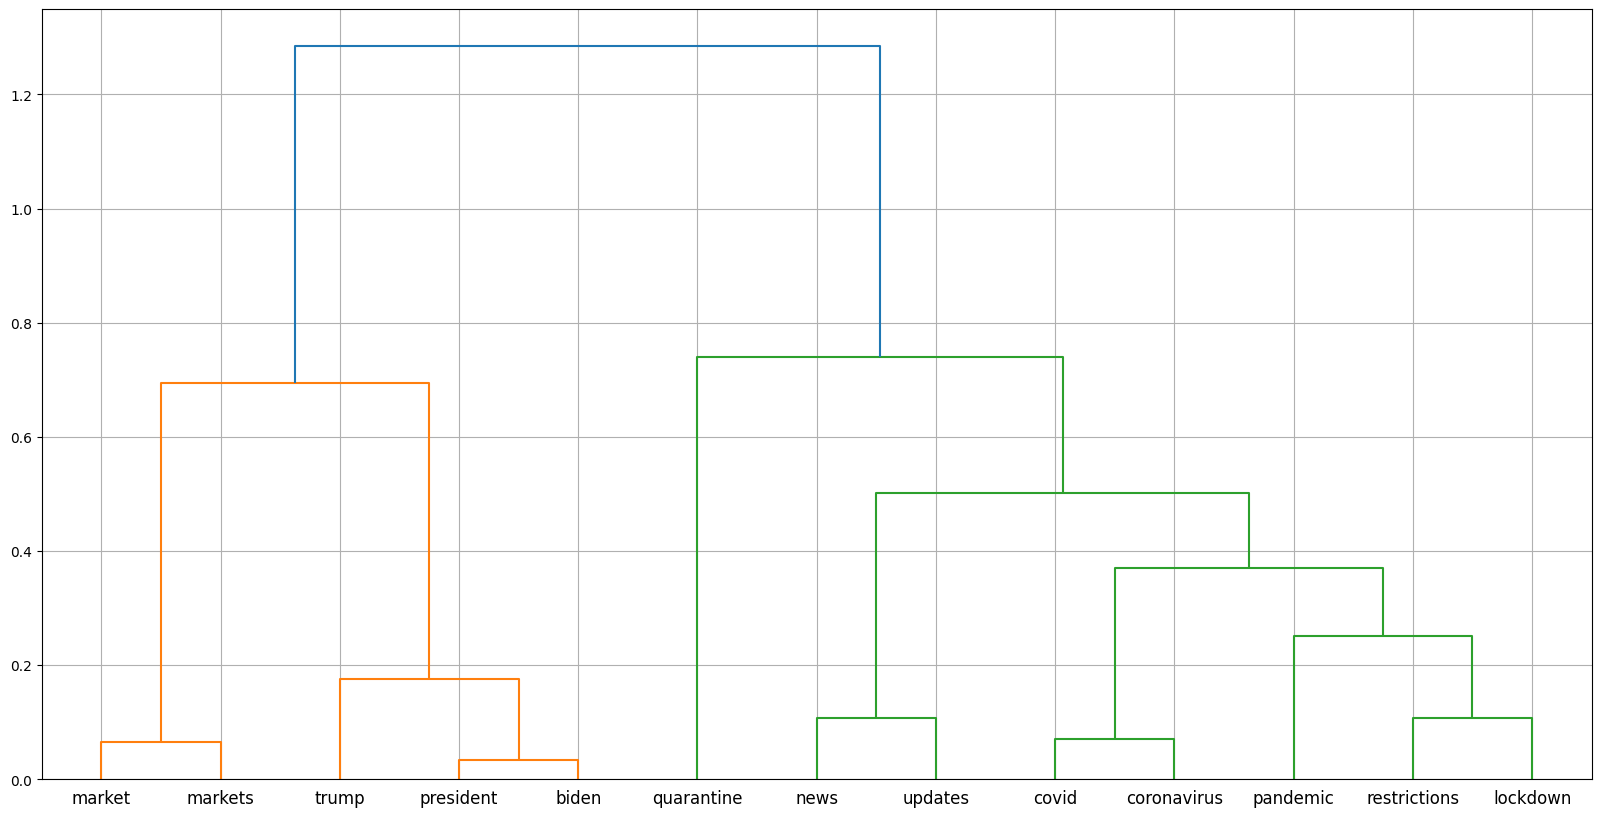

In [94]:
plt.figure(figsize=(20, 10))
dn = dendrogram(Z, labels=some_words)
plt.grid(True)

Elija un valor de threshold adecuado que pueda agrupar palabras con la misma semántica.

In [184]:
THRESHOLD = 0.2

In [185]:
vectors_of_words = [we_model.wv[w] for w in all_words]
Z = linkage(vectors_of_words,  metric="cosine", method="complete")
cluster_words = cut_tree(Z, height=THRESHOLD).flatten()


In [186]:
obtained_clusters = max(cluster_words)
print(len(all_words))
obtained_clusters

2345


99

Construya un diccionario que tenga por clave el número de cluster y por valor la lista de todas las palabras en dicho cluster.

Cluster 1:


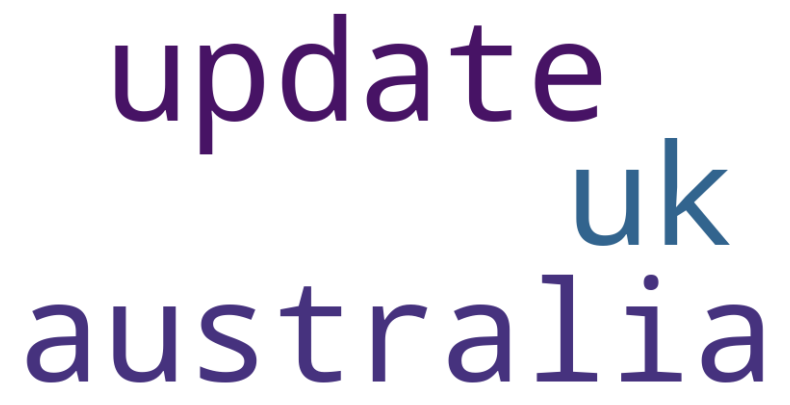

Cluster 5:


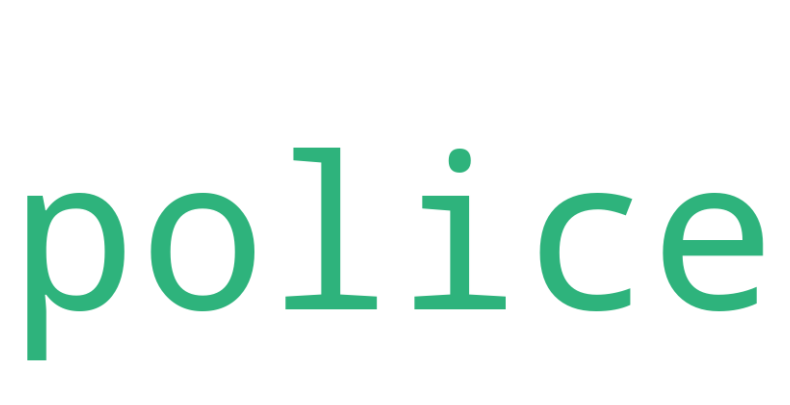

Cluster 6:


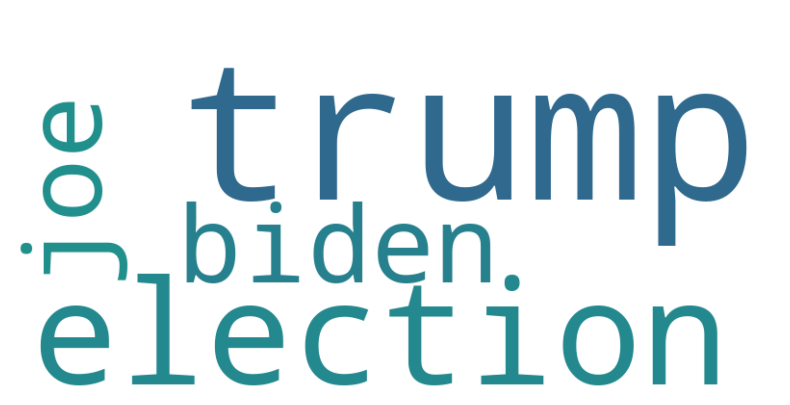

Cluster 8:


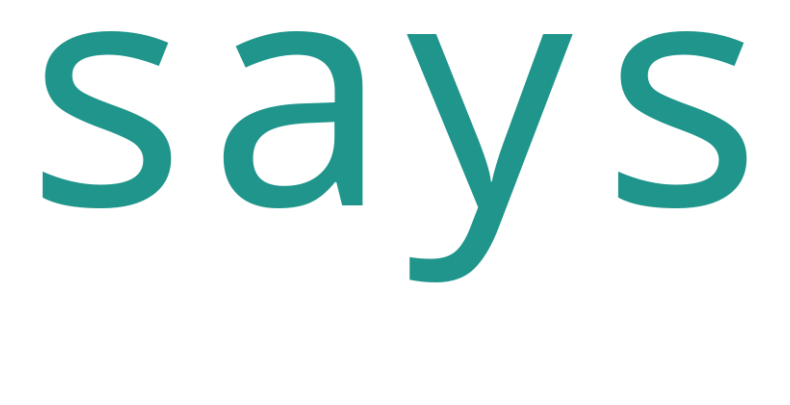

Cluster 56:


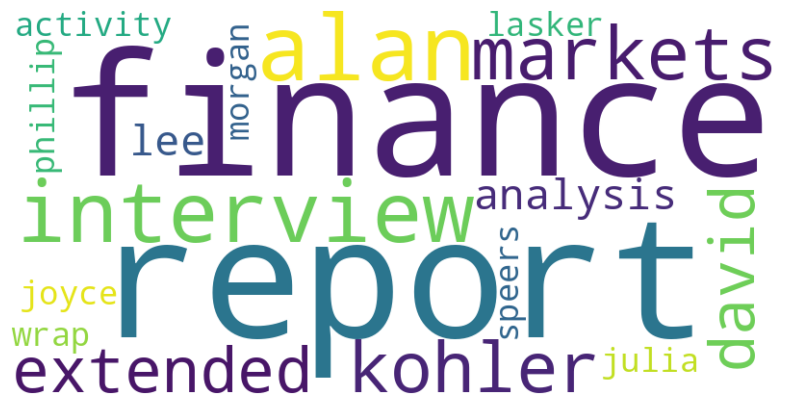

In [187]:
# Create a dictionary to store texts for each cluster
cluster_texts = {i: [] for i in range(obtained_clusters+1)} # It goes from 0 to 26


# Group texts by cluster
for i, (cluster_id, text) in enumerate(zip(cluster_words, all_words)):
    cluster_texts[cluster_id].append(text)


# Let's show some clusters
for cluster_id, cluster_texts_list in cluster_texts.items():
  if cluster_id in [1, 5, 6, 8, 56]:
    print(f"Cluster {cluster_id}:")
    generate_wordcloud(cluster_texts_list)


# Aquí ya vemos que hay unos cuantos clusters que funcionan bastante bien. Sin embargo otros que hemos filtrado en esta lista
# no llegan a captar relaciones entre palabras y suelen acoger pocas palabras sueltas en el cluster.
# Como medida podríamos eliminar aquellos cluster que no llegarán a un mínimo de palabras.

Construya un segundo diccionario con las traducciones que se deben realizar.

Es decir, si la palabra "covid" debe convertirse en "coronavirus", entonces el diccionario tendra una entrada como:

{
  "covid": "coronavirus"
}

Como representante de cada cluster, tome la palabra de mayor conteo (recuerde que en all_words están ordenadas por conteo).

In [188]:
dict_replacements = {}
for item in cluster_texts.items():
  list_cluster_words = item[1]

  for i in range(len(list_cluster_words)):
    current_word = list_cluster_words[i]
    if i == 0:
      cluster_main_word = current_word

    dict_replacements[current_word] = cluster_main_word




items = dict_replacements.items()
print(list(items)[0:10])


[('coronavirus', 'coronavirus'), ('covid', 'coronavirus'), ('australia', 'australia'), ('update', 'australia'), ('uk', 'australia'), ('nsw', 'nsw'), ('queensland', 'nsw'), ('wa', 'nsw'), ('sa', 'nsw'), ('new', 'new')]


Compruebe algunas entradas del diccionario para comprobar que salen cosas con sentido.

In [189]:
def replace_words_in_text(text):
  tokens = tokenizer(text)
  tokens_replacement = [dict_replacements.get(t, t) for t in tokens]
  return " ".join(tokens_replacement)


all_translated_words = [dict_replacements[w] for w in all_words]
print(len(all_words))
print(len(np.unique(all_translated_words)))

# Si probamos vemos que el 0.025 funciona más o menos bien (Aunque todavía hace algunas cosas raras como saved -> fish)
# Aunque de primeras no parezca mucha estamos reduciendo el número de palabras por 1/3 -> probablemente aquellas que no tienen representación están desapareciendo
# El 0.05 realizaba cambios como crash -> woman o continues -> farm
# Probablemente con mayor texto se podría entrenar un clusterizador mejor y reducir más el significado de las palabras

# Aunque no funciona muy bien más que para los cluster más grandes, hemos escogido el threshold de 0.2 para el prunning del clustering
# Y luego hemos decidido representar los wordclouds para los cluster más grandes.
for i in range(10):
  print("\nNew line")
  print(texts[i])
  print(replace_words_in_text(texts[i]))

2345
100

New line
10 people injured in fitzroy river boat crash
home years in fitzroy canberra canberra man

New line
2019 was australias hottest and driest year on record
was fight hottest and driest year on record

New line
a family film their return to lake conjola
a family power their workers to farm conjola

New line
angus taylor investigation referred to afp
farm indigenous investigation referred to farm

New line
anthony albanese continues to call for action
michael michael farm to call for action

New line
australian expats face tax slug cgt main residence exemption
australian expats workers long slug cgt main residence community

New line
australias only underground hospital was never used
fight only underground canberra was never used

New line
aviation fatality rate 2019 ethiopian airlines crash
aviation fatality industry ethiopian power man

New line
blake walton stayed to defend his property and filmed
farm walton stayed to defend his farm and farm

New line
brave malua l

Aplique la reducción de vocabulario a cada uno de los textos. Vuelva a dibujar las nubes de cada cluster pero sobre las frases con vocabulario reducido. Comente resultados.



Cluster 42, where INDIGENOUS is the main word of the cluster:


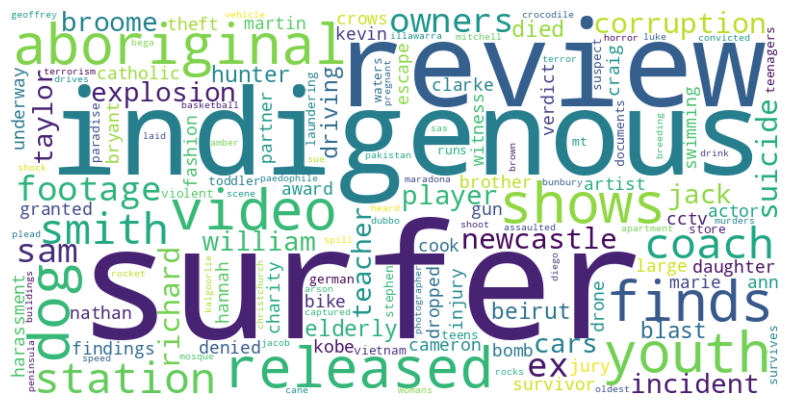



Cluster 52, where YEARS is the main word of the cluster:


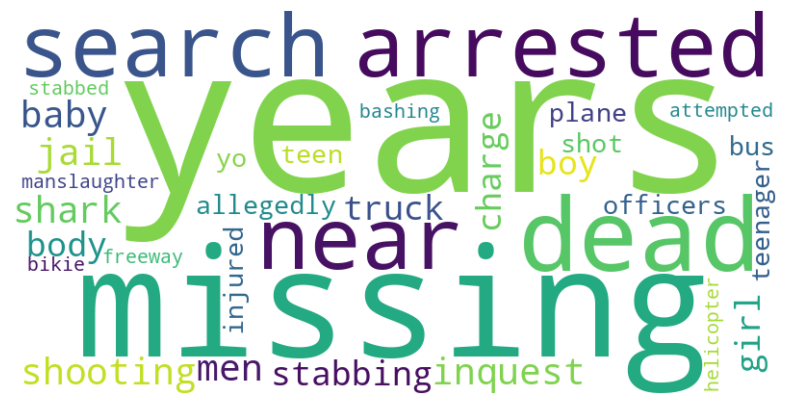



Cluster 57, where COMMUNITY is the main word of the cluster:


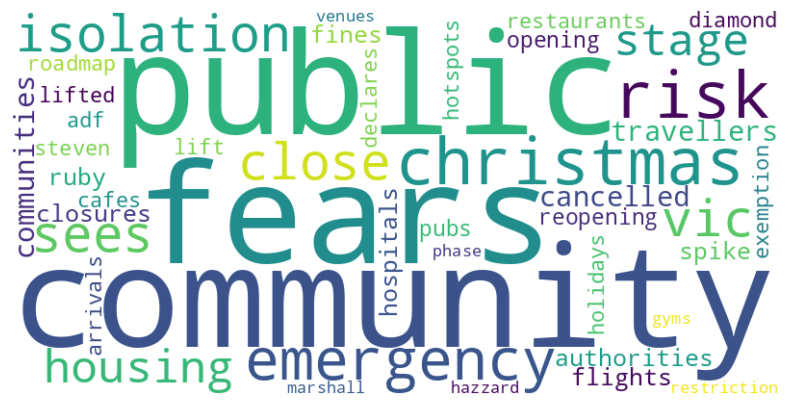



Cluster 67, where COUNCIL is the main word of the cluster:


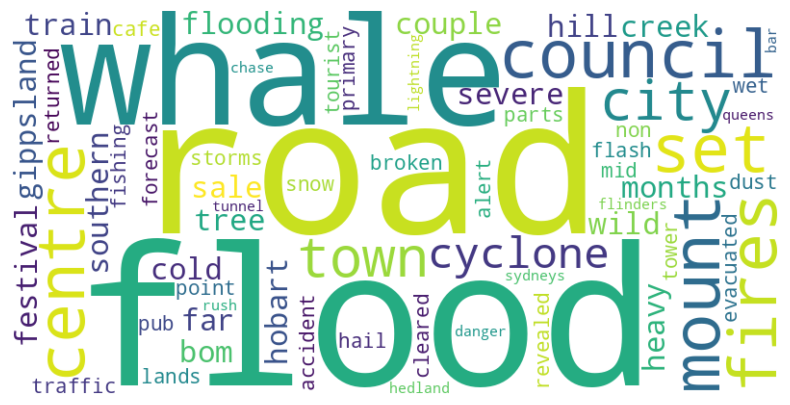



Cluster 71, where INDUSTRY is the main word of the cluster:


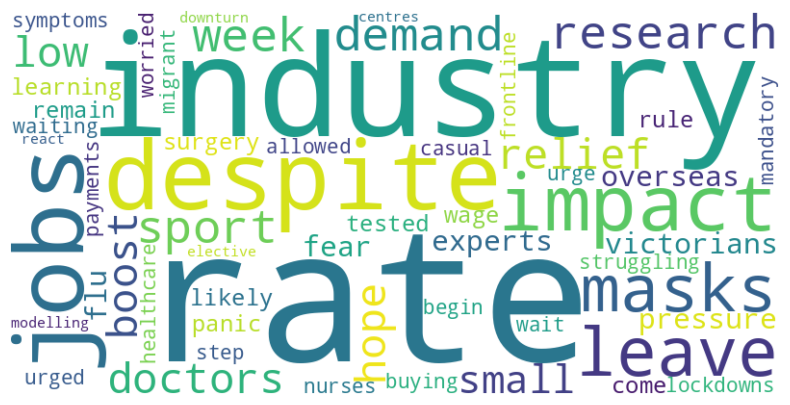



Cluster 80, where TASMANIAN is the main word of the cluster:


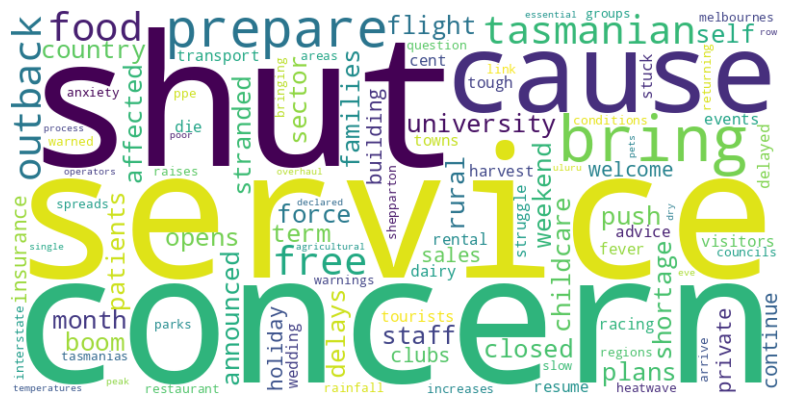



Cluster 82, where CHINESE is the main word of the cluster:


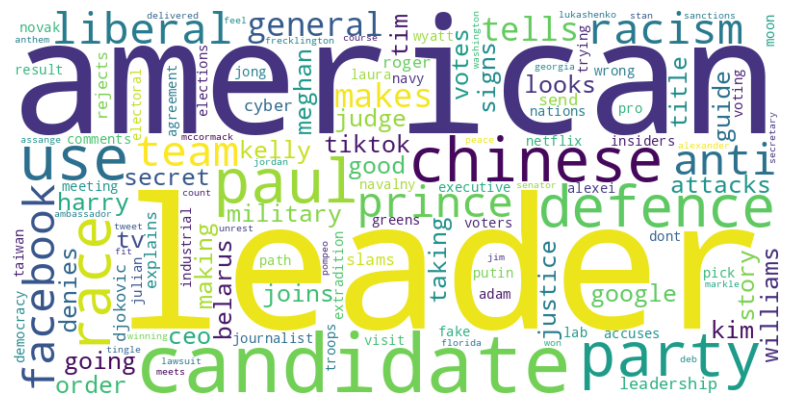



Cluster 85, where POWER is the main word of the cluster:


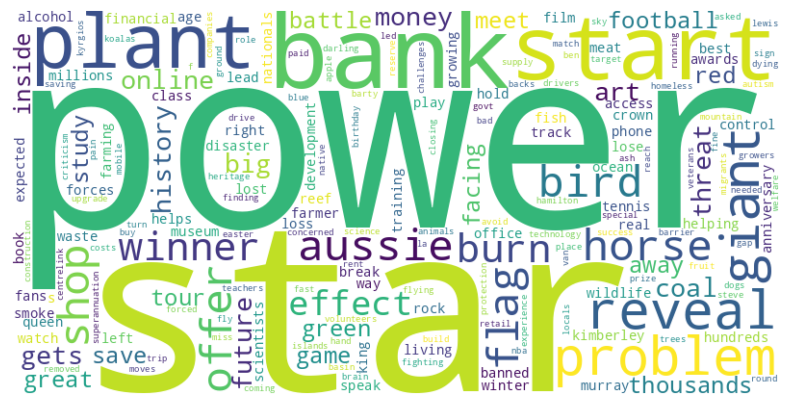



Cluster 87, where LONG is the main word of the cluster:


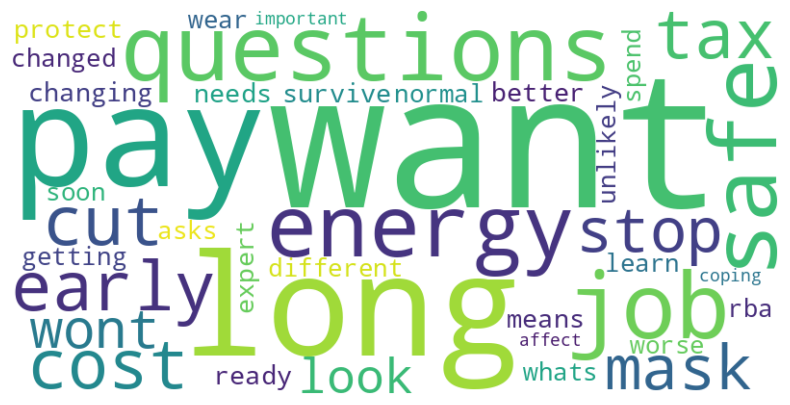



Cluster 90, where HITS is the main word of the cluster:


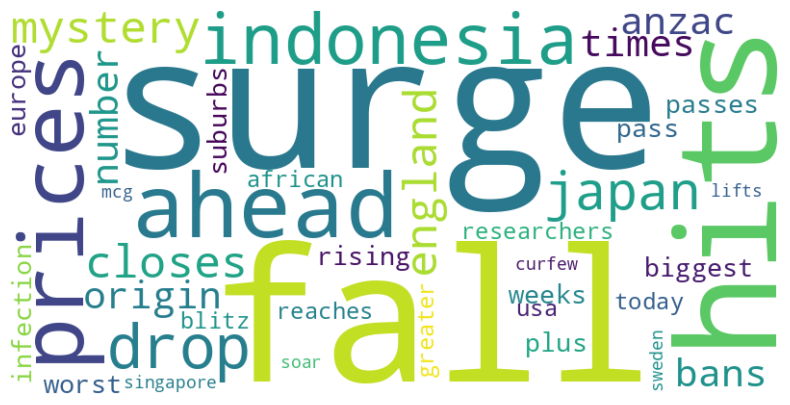



Cluster 93, where FARM is the main word of the cluster:


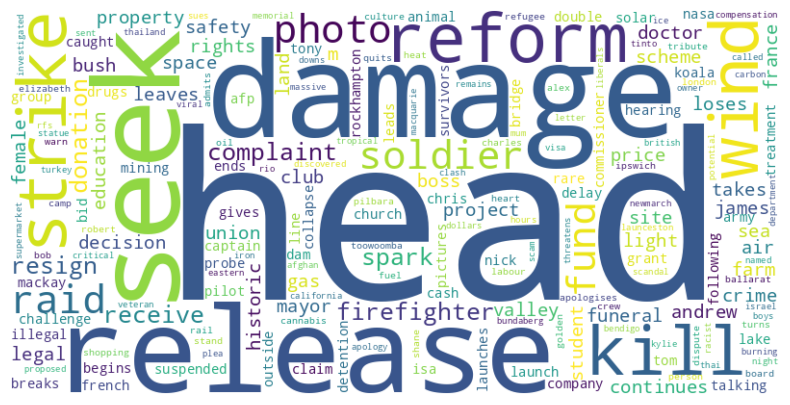



Cluster 95, where QANTAS is the main word of the cluster:


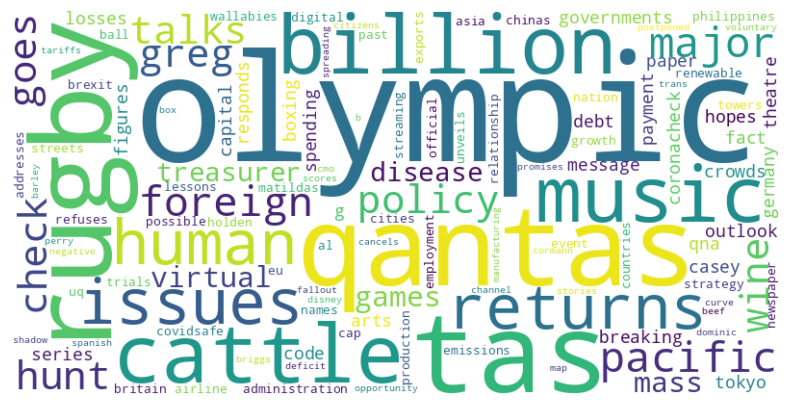

In [201]:

array_cluster_plot = []
for cluster_id, cluster_texts_list in cluster_texts.items():
  if len(cluster_texts_list) > 30:
    array_cluster_plot.append(cluster_id)



cluster_texts = {i: [] for i in range(obtained_clusters+1)} # It goes from 0 to 26


# Group texts by cluster
for i, (cluster_id, text) in enumerate(zip(cluster_words, all_words)):
    cluster_texts[cluster_id].append(text)


# Let's show some clusters
for cluster_id, cluster_texts_list in cluster_texts.items():
  if cluster_id in array_cluster_plot:
    print(f"\n\nCluster {cluster_id}, where {cluster_texts_list[0].upper()} is the main word of the cluster:")
    generate_wordcloud(cluster_texts_list)



# Conclusiones del estudio

Detallar las principales conclusiones extraidas sobre la aplicación de técnicas de word embedding para el tratamiento de textos.

Hemos visto la gran utilidad que tienen los embeddings. Sin embargo para un corpus relativamente pequeño no hemos visto una gran eficacia en la reducción de palabras por clustering. Otras metodologías se podrían aplicar para hacer que esta funcionalidad diera mejor resultado en nuestro caso de estudio.

Primero creemos que sería un buen procedimiento aplicar un coseno de similaridad entre todas las palabras de un mismo cluster. De esta forma podríamos sacar la palabra con más relevancia en el contexto del cluster.

Por otro lado, para poder eliminar el sesgo de nuestra muestra, es decir, palabras que no están relacionadas pero que aparecen similares entre sí cabría aplicar un modelo de reducción semántica preentrenado.